## Ad Click EDA


### Part 1: Exploratory Data Analysis of Ad click data.

In this part I will make an Exploratory Data Analysis of Ad click dataset.

The internet marketing is an important part of marketing strategies. The companies prefer to advertise their products on websites and social media platforms. It is important to targeting the right audience because it spending millions to display the advertisements to the audience who is not want to buy ours products can be costly. The Ad click is important because it allows to determine whether spending their money on digital advertising is worth or not. Nowadays, different types of advertisers and search engines rely on modeling to predict ad CTR (i.e. click-through rate) accurately.

The higher CTR shows more interest in that specific campaign, while a lower one indicates that this ad may not be as relevant. High CTR is important because shows that more people are clicking  to the website. It also helps to get beter ad position for less money on online platformas such as Google etc.

**Dataset**

The dataset comes from Kaggle.

Attributes:

- session_id - unique session id 
- DateTime - date time of log 
- user_id - unique user id 
- product - unique product
- campaign_id - unique campaign id
- webpage_id - unique webpage id 
- product_category_1 - unique product 1
- product_category_2 - unique product 2
- user_group_id - id of user group
- gender - gender of user
- age_level - age level of user
- user_depth 
- city_development_index 
- var_1 - unknown variable
- is_click - target


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

### Import libriaries and data

In [2]:
df = pd.read_csv(r'C:\Users\rohit\OneDrive\Desktop\ClickAd\Ad_click_prediction_train (1).csv')
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [3]:
df.shape

(463291, 15)

####  First observations:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [5]:
print(df.columns)

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')


Checking unique values in each column:

In [6]:
for column in df:
    print(f'Number of unique values in {column}:', df[column].nunique())

Number of unique values in session_id: 463291
Number of unique values in DateTime: 8610
Number of unique values in user_id: 150347
Number of unique values in product: 10
Number of unique values in campaign_id: 10
Number of unique values in webpage_id: 9
Number of unique values in product_category_1: 5
Number of unique values in product_category_2: 29
Number of unique values in user_group_id: 13
Number of unique values in gender: 2
Number of unique values in age_level: 7
Number of unique values in user_depth: 3
Number of unique values in city_development_index: 4
Number of unique values in var_1: 2
Number of unique values in is_click: 2


Checking the missing values in data:

In [7]:
df.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

Checking missing values in data by use heat maps:

<Axes: >

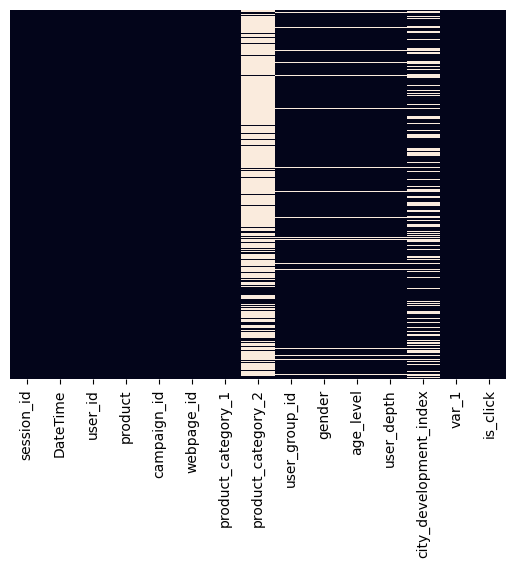

In [8]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

The white lines shows the NaN values, which must be removed in order to train ML model.

### Data pre-processing

In the data there are rows that contain a null result so I delete missing values in gender, age_level, user_group_id, user_depth variables.

In [9]:
df2 = df.copy()

In [10]:
df2 = df2.dropna(subset=['gender','age_level', 'user_group_id', 'user_depth'])

In [11]:
df2.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        351379
user_group_id                  0
gender                         0
age_level                      0
user_depth                     0
city_development_index    106886
var_1                          0
is_click                       0
dtype: int64

In [12]:
df2.shape

(445048, 15)

**Feature engineering for date time features**

In [13]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'], errors='coerce')

Extract hour from DateTime feature:

In [14]:
df2['hour'] = df2['DateTime'].dt.hour

Extract Day of week from DateTime feature:

In [15]:
df2['day_of_week'] = df2['DateTime'].apply(lambda x: x.dayofweek)

In [16]:
df2.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day_of_week
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,0,6
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,6
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,6
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,0,6
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,0,6


### Exploratory Data Analysis

In the data ad click is marked as 'is click' where 1 = is click and 0 = no click.

In [17]:
df2['is_click'].value_counts()

is_click
0    414991
1     30057
Name: count, dtype: int64

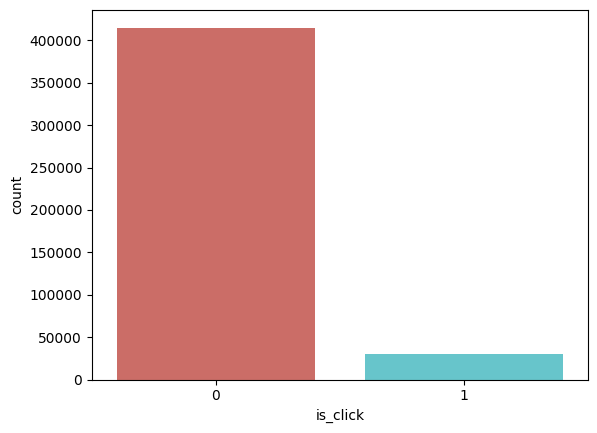

In [18]:
sns.countplot(x='is_click',data=df2, palette='hls')
plt.show();

The above analysis showed that data are imbalanced, more user is not ad click than is click. When building models and their evaluation it will need to account for this.

**Calculating of click through rate (CTR):**

CTR is the ratio of ad clicks to impressions. It measures the rate of clicks on each ad. CTR is calculate by dividing the number of clicks by the number of impressions and expressing the result as a percentage.

In [19]:
df2['is_click'].value_counts()/len(df2)

is_click
0    0.932463
1    0.067537
Name: count, dtype: float64

In [20]:
percent = df2.groupby('is_click')['is_click'].count() / df2.shape[0] * 100
percent

is_click
0    93.246346
1     6.753654
Name: is_click, dtype: float64

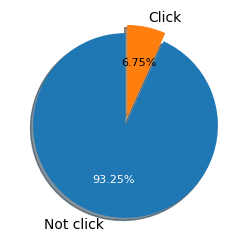

In [21]:
labels = ['Not click', 'Click']
fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(percent, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

From above one can see the overall click through rate (CTR) is around 7% and the 93% ads is not clicked.

Below it will make a CTR (click through rate) analysis  with the other variables

**Gender distribution:**

In [22]:
df2['gender'].value_counts()

gender
Male      393454
Female     51594
Name: count, dtype: int64

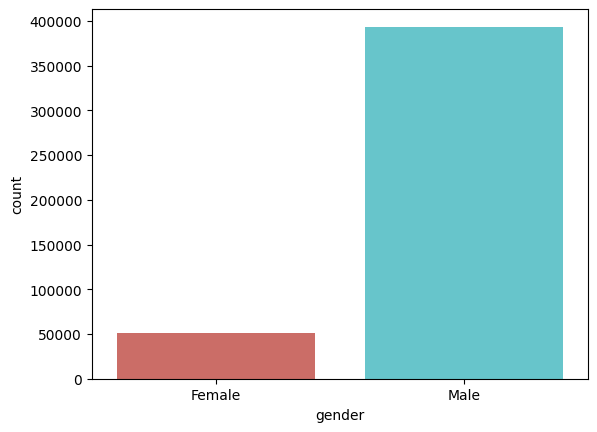

In [23]:
sns.countplot(x='gender',data=df2, palette='hls')
plt.show();

Click depending on gender:

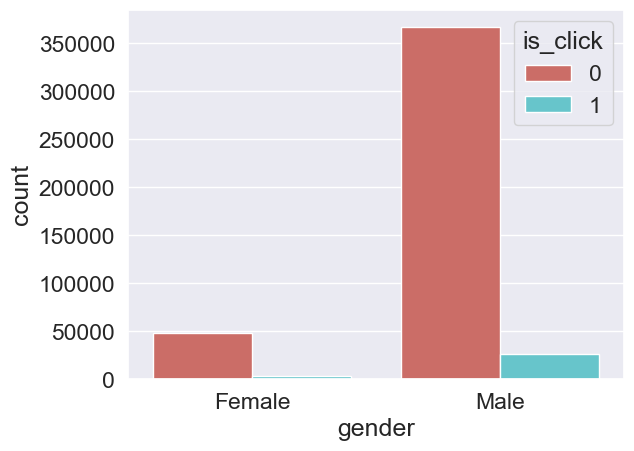

In [24]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['gender'],hue=df2['is_click'], palette='hls')
plt.show()

In [25]:
df2["is_click"][df2["is_click"]==1].groupby(by=df2["gender"]).count()

gender
Female     3325
Male      26732
Name: is_click, dtype: int64

There are more men users than women users and the male users are click more than female.

Calculating of click through rate (CTR):

In [26]:
gender = df2[["gender", "is_click"]].groupby("gender").mean()*100

In [27]:
gender

,is_click
gender,
Female,6.444548
Male,6.794187


In [28]:
gender2 = round(gender, 2)

In [29]:
gender2.rename(columns={'is_click':'CTR rate (%)'})

,CTR rate (%)
gender,
Female,6.44
Male,6.79


<Figure size 1000x500 with 0 Axes>

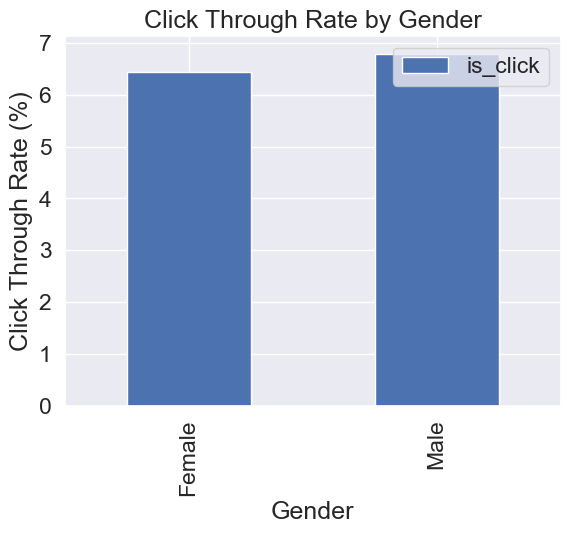

In [30]:
plt.figure(figsize=(10,5))

gender2.plot(kind = 'bar')
plt.title('Click Through Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Click Through Rate (%)')
plt.show();

Although female has the lower number of impressions and clicks  they have similar to male high CTR. This indicator does not differ much by gender.

#### DateTime

In [31]:
df2.DateTime.describe()

count                           445048
mean     2017-07-05 00:44:12.818257664
min                2017-07-02 00:00:00
25%                2017-07-03 12:10:00
50%                2017-07-04 22:23:00
75%                2017-07-06 12:45:00
max                2017-07-07 23:59:00
Name: DateTime, dtype: object

The data covers 6 days of click streams data from  2017-07-02 to 2017-07-07 that is 144 hours.

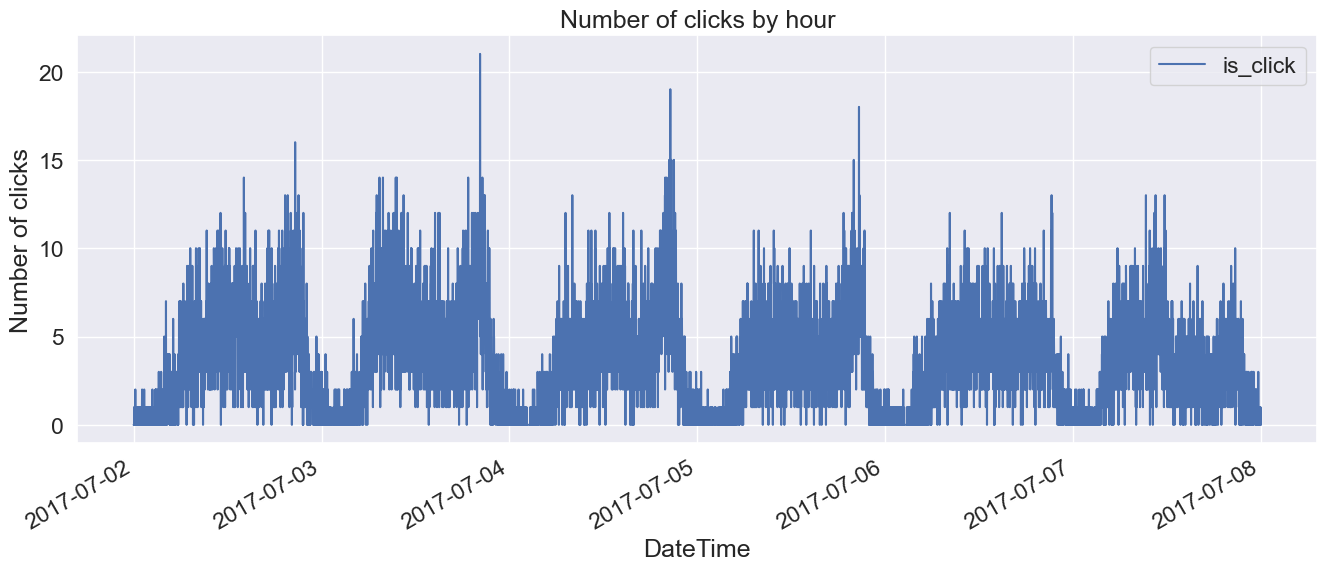

In [32]:
df2.groupby('DateTime').agg({'is_click':'sum'}).plot(figsize=(16,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

The hourly clicks pattern looks pretty similar every day. Although there were a couple of peak hours all were in the morning of day on July 4, 5 and 6. 

Let's take a look in hour:

#### Hour

In [33]:
df2['hour'].value_counts()

hour
20    34119
19    31359
10    29236
11    26227
18    26031
14    24957
8     24761
13    24165
12    24109
9     24063
7     23530
15    22605
17    21934
16    20617
21    20617
6     20019
5     14475
4     10181
22     8236
3      4758
23     3952
0      2107
1      1501
2      1489
Name: count, dtype: int64

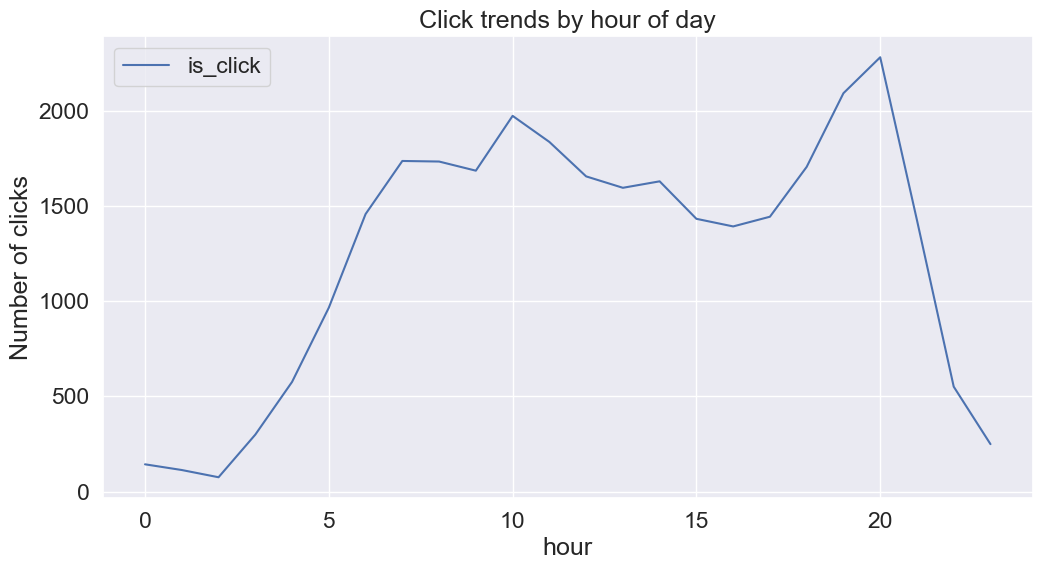

In [34]:
df2.groupby('hour').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Click trends by hour of day');

In general the highest number of clicks and impressions is at hour 20 and the lowest number of clicks is at hour 2 at night. 

Clicks and impressions depending on hour:

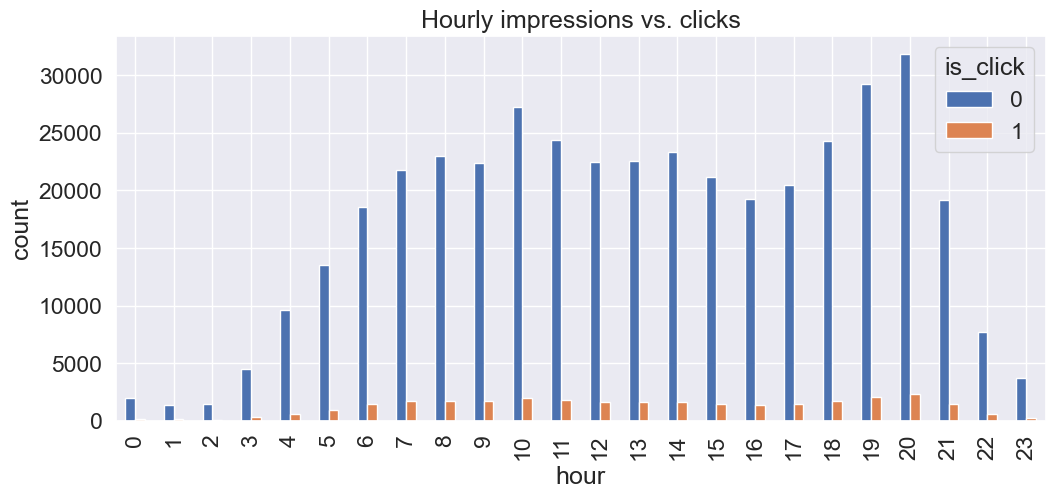

In [35]:
df2.groupby(['hour', 'is_click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,5))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

The heighest number of impressions and clicks were at hour 20.

Calculating of click through rate (CTR):

#### Hourly CTR

In [36]:
df_click = df2[df2['is_click'] == 1]
df_hour = df2[['hour','is_click']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'is_click': 'impressions'})
df_hour['is_clicks'] = df_click[['hour','is_click']].groupby(['hour']).count().reset_index()['is_click']
df_hour['CTR'] = df_hour['is_clicks']/df_hour['impressions']*100

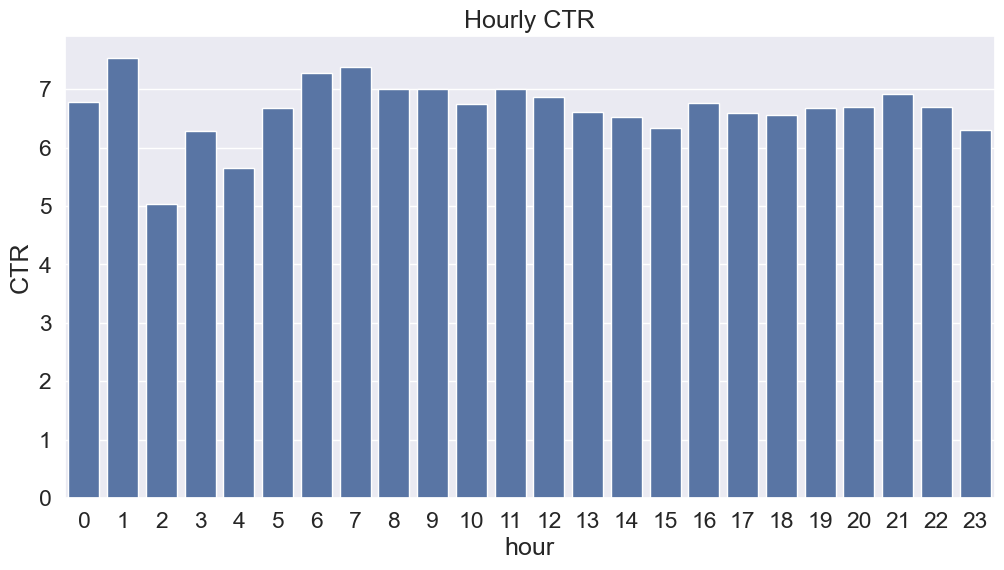

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR');

One of the interesting observation here is that the highest CTR happened in at hours 1.00, 6.00 and 7.00. From above plots one can see that at hour 1.00  was the least number of impressions and clicks.

#### Day of week

NOTE: Monday = 0, Sunday = 6

In [38]:
df2['day_of_week'].value_counts()

day_of_week
0    77836
2    77690
6    75470
3    74848
1    70238
4    68966
Name: count, dtype: int64

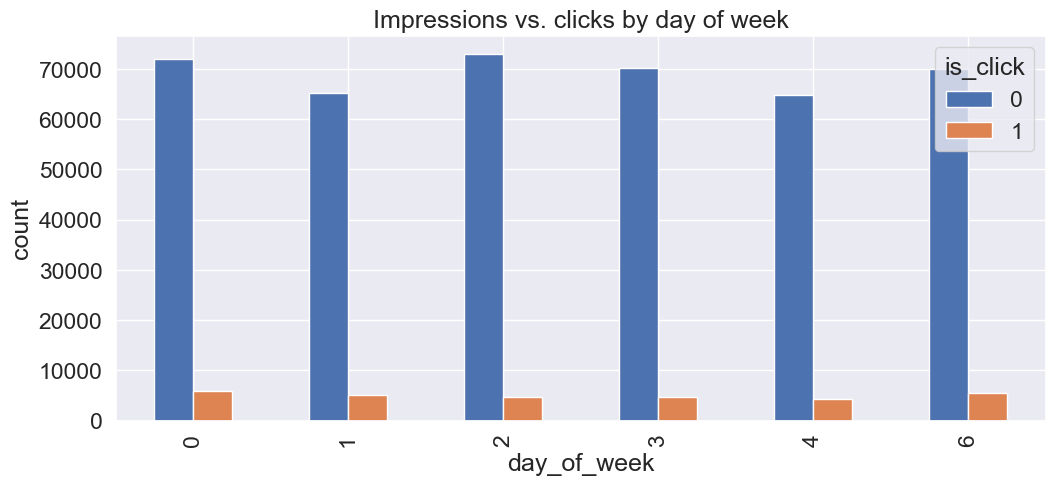

In [39]:
df2.groupby(['day_of_week','is_click']).size().unstack().plot(kind='bar', figsize=(12,5))
plt.ylabel('count')
plt.title('Impressions vs. clicks by day of week');

Mondays have the most number of impressions and clicks, then Wednesdays and Sundays. Tuesdays and Fridays have the least number of impressions and clicks.

#### Day of week CTR:

In [40]:
df_click = df2[df2['is_click'] == 1]
df_dayofweek = df2[['day_of_week','is_click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'is_click': 'impressions'})
df_dayofweek['is_clicks'] = df_click[['day_of_week','is_click']].groupby(['day_of_week']).count().reset_index()['is_click']
df_dayofweek['CTR'] = df_dayofweek['is_clicks']/df_dayofweek['impressions']*100

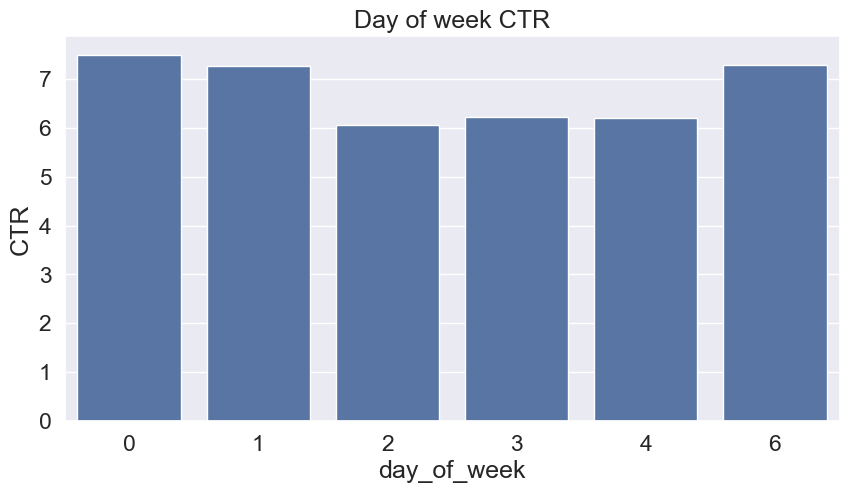

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek)
plt.title('Day of week CTR');

The highest CTR have mondays as the highest number of impressions and clicks. Although tuesdays have the lower number of impressions and clicks, their CTR are among the highest.


### Below the analysis of other variables

In this step I choose only clicked values and save in df_click variable:

In [42]:
df_click = df2[df2['is_click'] == 1]

**Age distribution:**

In [43]:
df2['age_level'].value_counts()

age_level
3.0    160581
2.0    143501
4.0     63859
1.0     43367
5.0     30828
6.0      2759
0.0       153
Name: count, dtype: int64

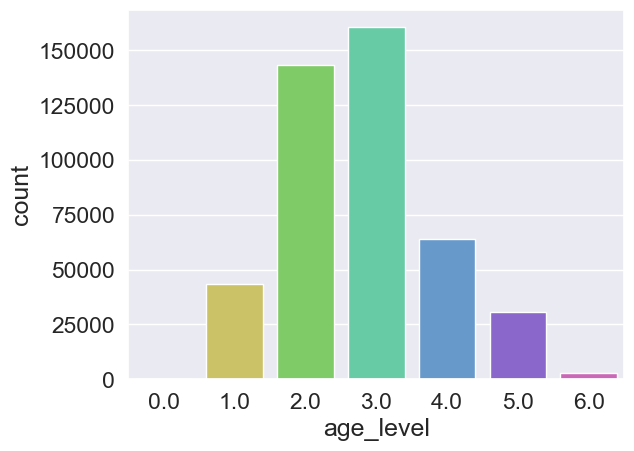

In [44]:
sns.countplot(x='age_level',data=df2, palette='hls')
plt.show();

The most users are age_level of 3 and 2 i.e. twenty, thirty years old. 

##### Clicks depending on age:

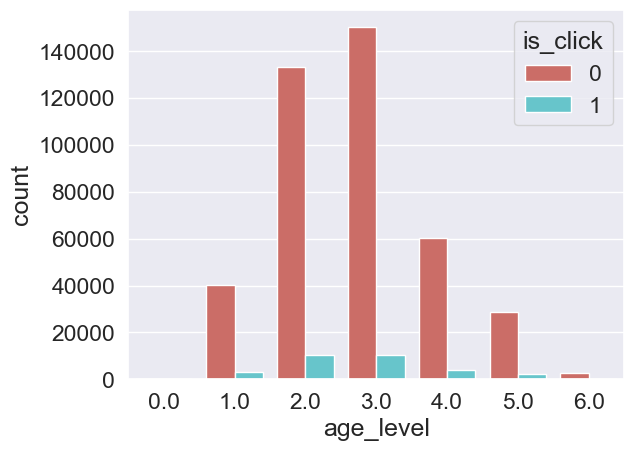

In [45]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['age_level'],hue=df2['is_click'], palette='hls')
plt.show()

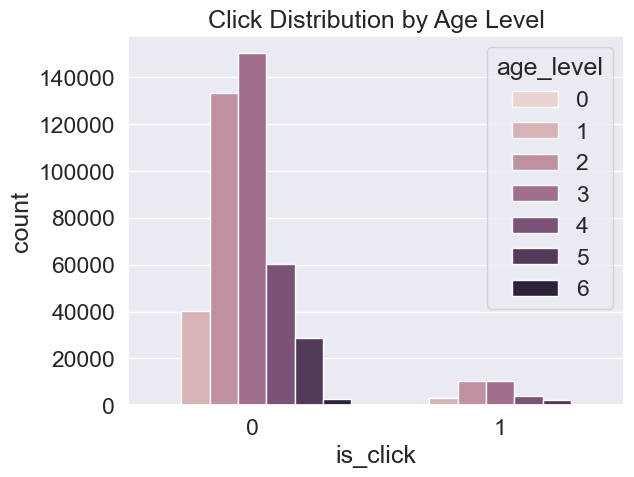

In [47]:
sns.countplot(data=df, x='is_click', hue='age_level')
plt.title("Click Distribution by Age Level")
plt.show()

Age levels 2 and 3 get the most impressions and clicks and the other ones get only the minimum impressions and clicks.

##### Calculating of click through rate (CTR):

In [48]:
df2[["age_level", "is_click"]].groupby("age_level").mean()*100

,is_click
age_level,
0.0,8.496732
1.0,7.480342
2.0,7.091937
3.0,6.451573
4.0,5.872312
5.0,7.415337
6.0,8.227619


The highest CTR have level 0 and 6  i.e. children and olds. Although levels 2 and 3 get the most impressions and clicks they have not a biggest CTR value.

**User group id**

In [49]:
df2['user_group_id'].value_counts()

user_group_id
3.0     140317
2.0     137278
4.0      50080
1.0      41946
5.0      21989
9.0      20264
10.0     13779
11.0      8839
8.0       6223
6.0       1724
7.0       1421
12.0      1035
0.0        153
Name: count, dtype: int64

The most users are in 3 and 2 groups.

##### Clicks depending on user group:

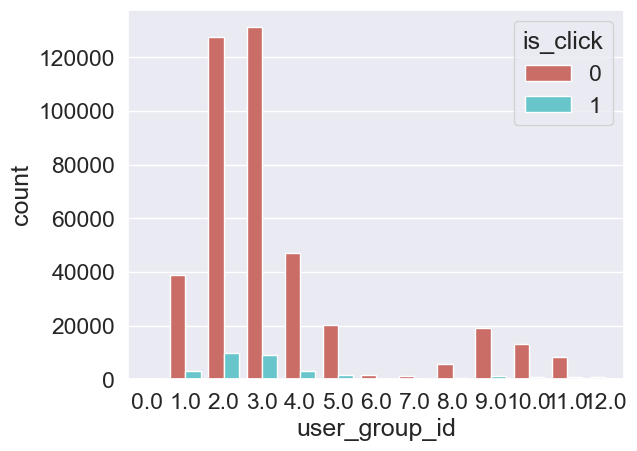

In [50]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['user_group_id'],hue=df2['is_click'], palette='hls')
plt.show()

Only clicks in user groups:

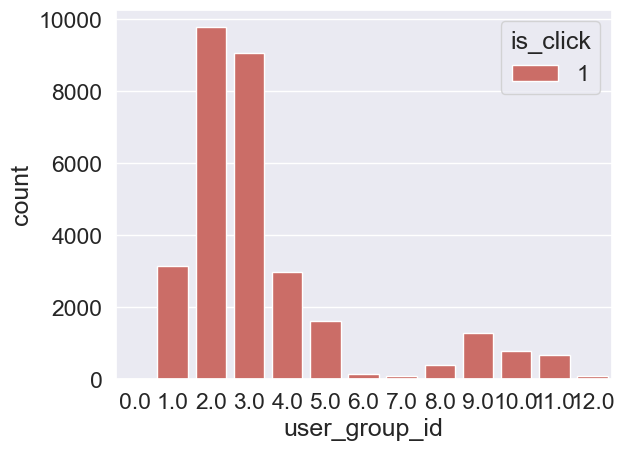

In [51]:
sns.set(font_scale=1.5)
sns.countplot(x=df_click['user_group_id'],hue=df_click['is_click'], palette='hls')
plt.show()

Users groups 3 and 2 get the most impressions and clicks. Groups 1, 4 and 5 are garnering smaller clicks and the others groups get only the minimum impressions and clicks.

##### Calculating of click through rate (CTR):

In [52]:
df2[["user_group_id", "is_click"]].groupby("user_group_id").mean()*100

,is_click
user_group_id,
0.0,8.496732
1.0,7.514423
2.0,7.124230
3.0,6.466786
4.0,5.932508
5.0,7.312747
6.0,7.830626
7.0,6.474314
8.0,6.379560


The highest CTR have groups 0 and 12 though groups 3 and 2 have the most impressions and clicks. 

**User depth:**

In [53]:
df2['user_depth'].value_counts()

user_depth
3.0    402798
2.0     30389
1.0     11861
Name: count, dtype: int64

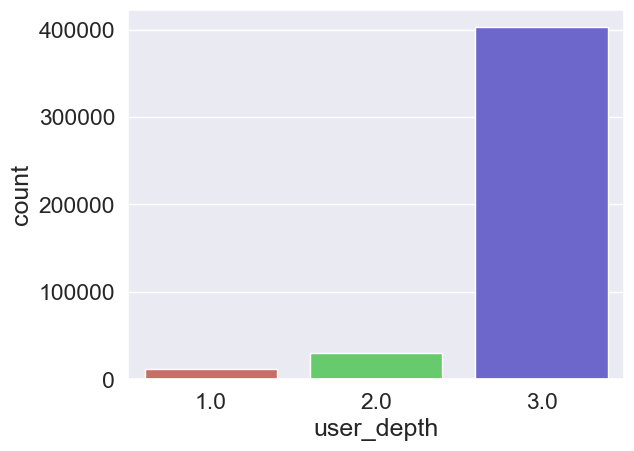

In [54]:
sns.countplot(x='user_depth',data=df2, palette='hls')
plt.show();

There are 3 user_depth and  the most are in 3 group.

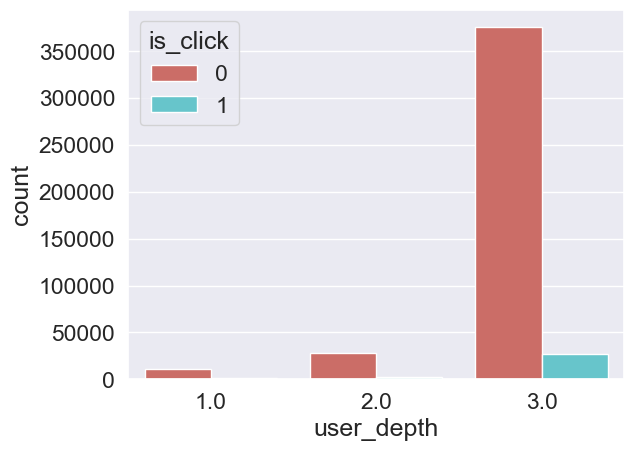

In [55]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['user_depth'],hue=df2['is_click'], palette='hls')
plt.show()

User depth 3 gets the highest clicks and impressions.

**Var 1 feature**

Var 1 is an anonymized categorical feature and not know its meaning but one can see its distribution. 

In [56]:
df2.var_1.value_counts()

var_1
0    254649
1    190399
Name: count, dtype: int64

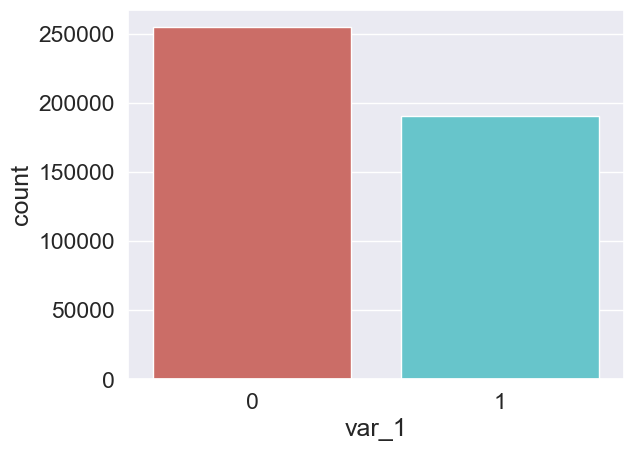

In [57]:
sns.countplot(x='var_1',data=df2, palette='hls')
plt.show();

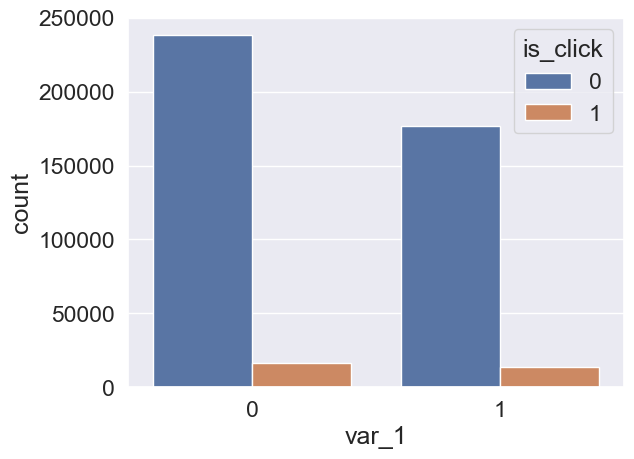

In [58]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['var_1'],hue=df2['is_click'])
plt.show()

In variable Var 1 one can distinct two values  0 and 1. The values are garnering similar impressions and clicks.

**Products distribution:**

Products in our data are divided into product, product_category_1 and product_category_2. 

In [59]:
df2['product'].value_counts()

product
C    157822
H    104976
I     61075
D     39524
B     21262
E     20639
A     14684
J      9271
G      9144
F      6651
Name: count, dtype: int64

Clicks depending on product:

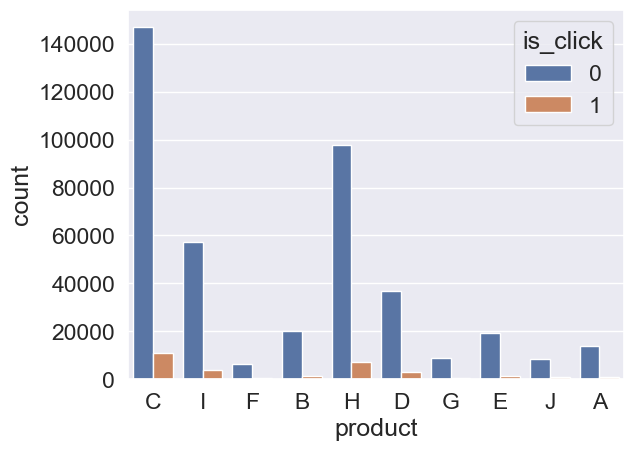

In [60]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['product'],hue=df2['is_click'])
plt.show()

There are ten different products in data.

Only clicks in product:

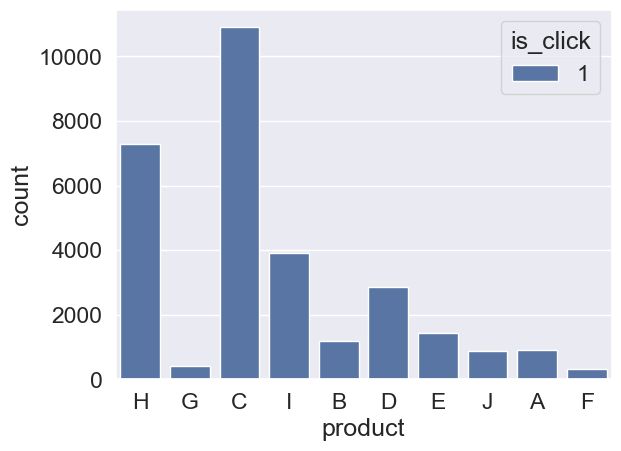

In [61]:
sns.set(font_scale=1.5)
sns.countplot(x=df_click['product'],hue=df_click['is_click'])
plt.show()

Products C and H get the most impressions and clicks and the others products get only the minimum impressions and clicks. Products C and H seem to be nice choice for placing advertisements as per number of clicks.

#### Product_category_1

In [62]:
df2['product_category_1'].value_counts()

product_category_1
4    129279
3    109331
1     76211
2     66551
5     63676
Name: count, dtype: int64

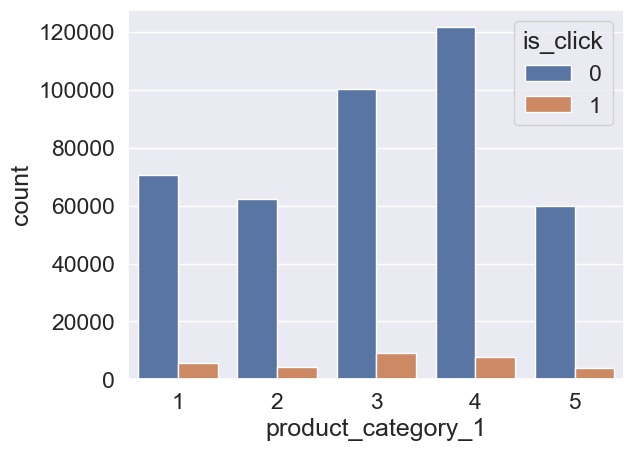

In [63]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['product_category_1'],hue=df2['is_click'])
plt.show()

##### Only clicks in product category_1:

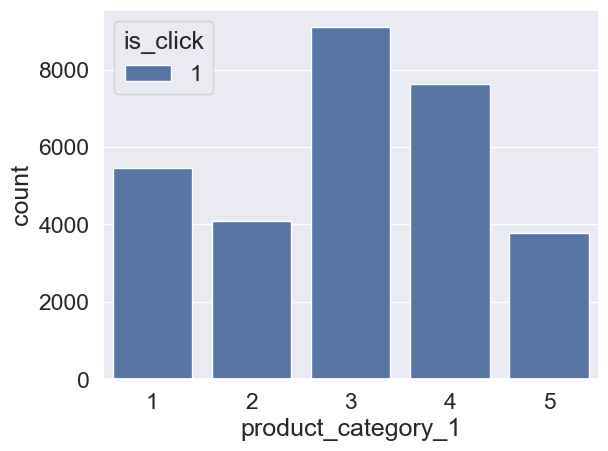

In [64]:
sns.set(font_scale=1.5)
sns.countplot(x=df_click['product_category_1'],hue=df_click['is_click'])
plt.show()

There are five different products in category 1. The values are garnering similar impressions and clicks. Products 3 and 4 get the most impressions and clicks however product 3 takes the heighest clicks.  

#### Product_category_2

In [65]:
df2['product_category_2'].value_counts()

product_category_2
82527.0     34822
146115.0    23767
270915.0    18948
254132.0    11961
143597.0     2406
269093.0      821
32026.0       554
18595.0        66
408790.0       61
255689.0       59
419804.0       43
372532.0       36
66101.0        33
234846.0       25
235358.0       17
450184.0       14
408831.0       11
327439.0        8
300711.0        4
168114.0        2
99226.0         2
447834.0        2
202351.0        1
301147.0        1
270147.0        1
181650.0        1
419304.0        1
381435.0        1
247789.0        1
Name: count, dtype: int64

##### Clicks depending on product_category_2:

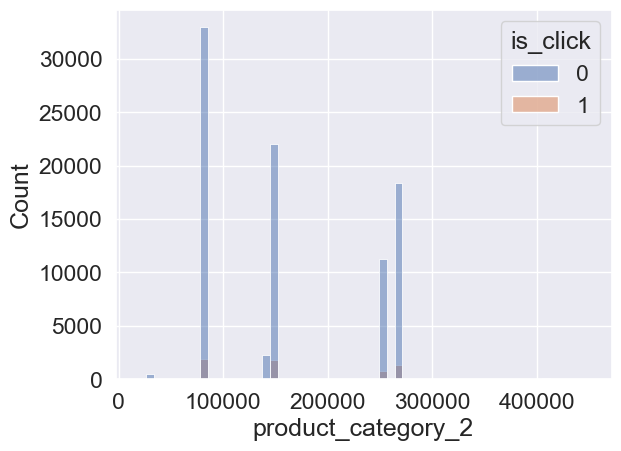

In [66]:
sns.set(font_scale=1.5)
sns.histplot(data=df2,x='product_category_2',hue='is_click')
plt.show()

Only clicks in product_category_2:

In [67]:
df_click['product_category_2'].value_counts().head()

product_category_2
82527.0     1870
146115.0    1773
270915.0    1295
254132.0     764
143597.0     137
Name: count, dtype: int64

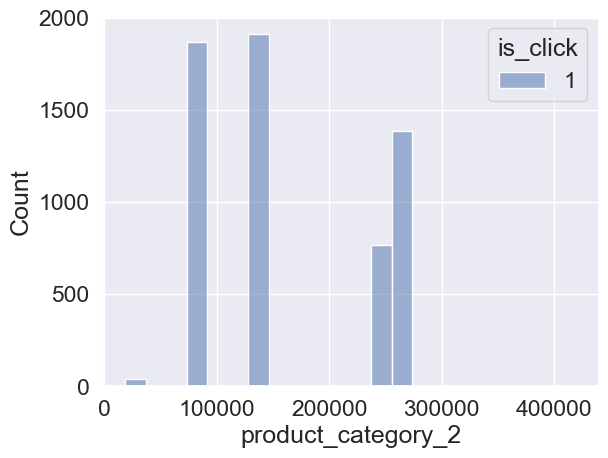

In [68]:
sns.set(font_scale=1.5)
sns.histplot(data=df_click,x='product_category_2',hue='is_click')
plt.show()

There are many products in category 2. One can see which product id has the most impressions and clicks. It seems that they are be good choice for placing advertisements.

**Id campaign distribution:**

In [69]:
df2['campaign_id'].value_counts()

campaign_id
359520    104544
405490     92168
360936     50048
118601     34822
98970      33904
414149     28056
404347     27376
82320      26016
105960     24873
396664     23241
Name: count, dtype: int64

Clicks depending on id campaign:

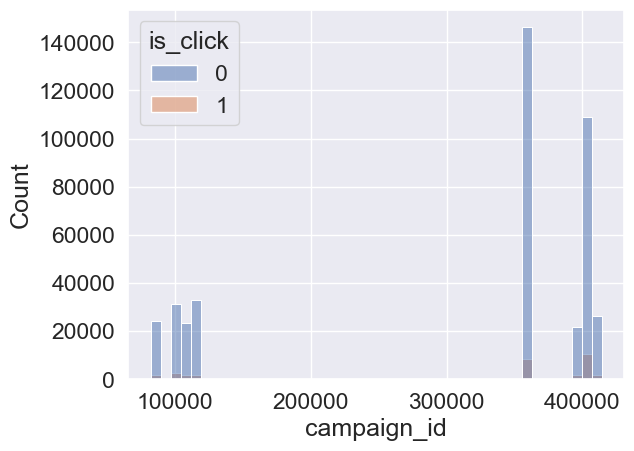

In [70]:
sns.set(font_scale=1.5)
sns.histplot(data=df2,x='campaign_id',hue='is_click')
plt.show()

Only clicks in campaign id:

In [71]:
df_click['campaign_id'].value_counts().head()

campaign_id
405490    8380
359520    6124
98970     2602
360936    2258
404347    2130
Name: count, dtype: int64

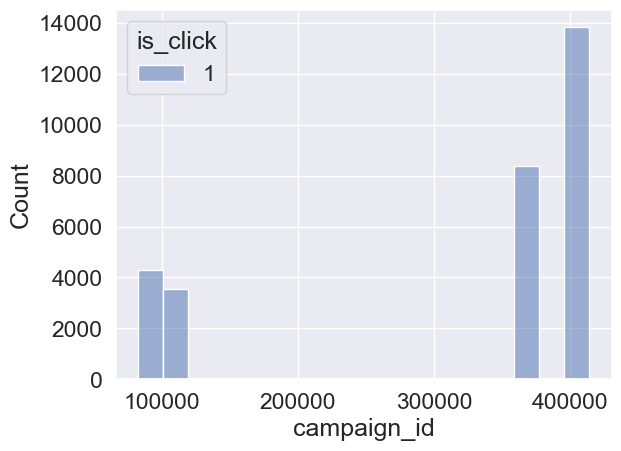

In [72]:
sns.set(font_scale=1.5)
sns.histplot(data=df_click,x='campaign_id',hue='is_click')
plt.show()

There are 10 different campaigns. One can see which campaign id has the most impressions and clicks. It seems that they are be good choice for placing advertisements.

**Webpage id distribution:**

In [73]:
df2['webpage_id'].value_counts()

webpage_id
13787    154592
60305     92168
28529     34822
6970      33904
45962     28056
53587     27376
1734      26016
11085     24873
51181     23241
Name: count, dtype: int64

##### Clicks depending on webpage id:

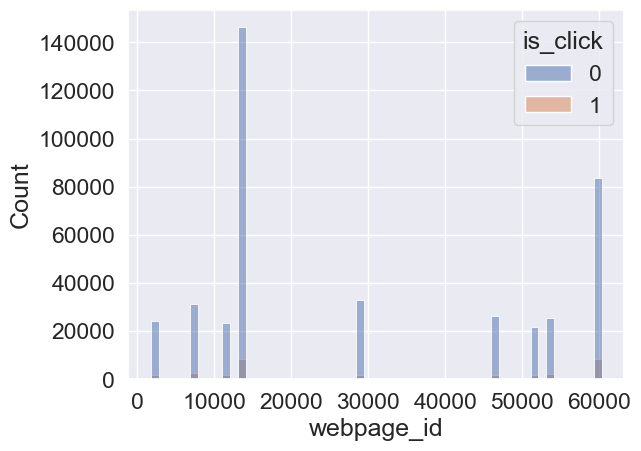

In [74]:
sns.set(font_scale=1.5)
sns.histplot(data=df2,x='webpage_id',hue='is_click')
plt.show()

Only clicks in webpage id:

In [75]:
df_click['webpage_id'].value_counts().head()

webpage_id
13787    8382
60305    8380
6970     2602
53587    2130
28529    1870
Name: count, dtype: int64

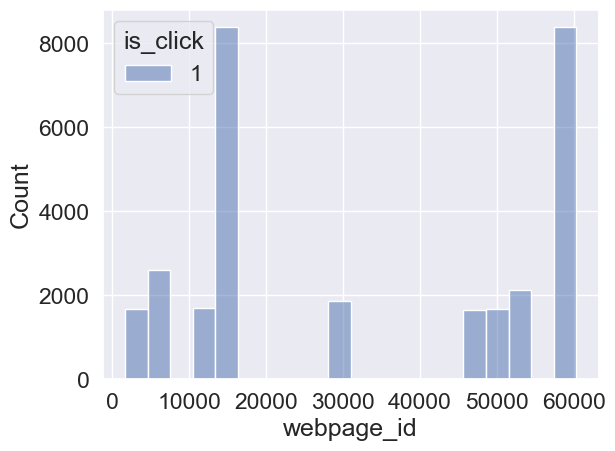

In [76]:
sns.set(font_scale=1.5)
sns.histplot(data=df_click,x='webpage_id',hue='is_click')
plt.show()

There are 9 different webpages in data. One can see which webpages id has the most impressions and clicks.

**City development index**

In [77]:
df2['city_development_index'].value_counts()

city_development_index
2.0    147643
3.0     88709
4.0     67166
1.0     34644
Name: count, dtype: int64

##### Clicks depending on city development index:

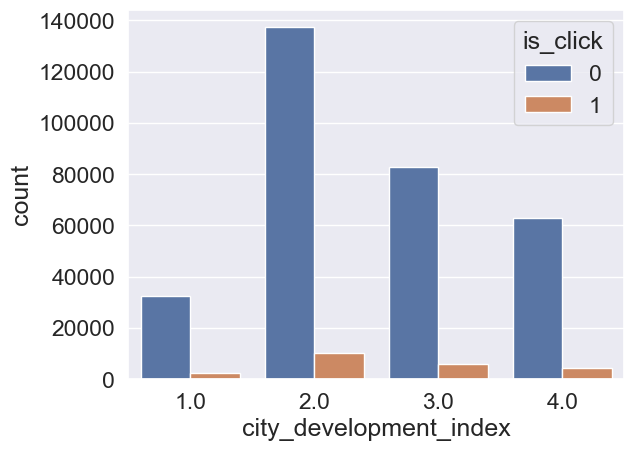

In [78]:
sns.set(font_scale=1.5)
sns.countplot(x=df2['city_development_index'],hue=df2['is_click'])
plt.show()

Only clicks in city development index:

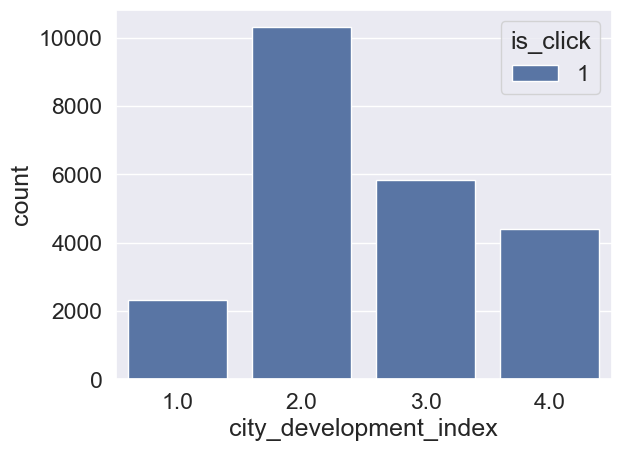

In [79]:
sns.set(font_scale=1.5)
sns.countplot(x=df_click['city_development_index'],hue=df_click['is_click'])
plt.show()

In variable city_development_index one can distinct four different values. Index 2 gets the most impressions and clicks and the others ones get the smaller values.

##### Calculating of click through rate (CTR):

In [80]:
df2[["city_development_index", "is_click"]].groupby("city_development_index").mean()*100

,is_click
city_development_index,
1.0,6.699573
2.0,6.983738
3.0,6.569796
4.0,6.534556


Index 2 has the heighest CTR similary to the number of impressions and clicks. In the others indexes this indicator does not differ much.

### Checking statistics

In [81]:
df2.describe()

,session_id,DateTime,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click,hour,day_of_week
count,445048.000000,445048,4.450480e+05,445048.000000,445048.000000,445048.000000,93669.000000,445048.000000,445048.000000,445048.000000,338162.000000,445048.000000,445048.000000,445048.000000,445048.000000
mean,285567.570305,2017-07-05 00:44:12.818257664,5.465205e+05,308266.086063,29628.563697,3.084616,162342.124481,3.477396,2.782266,2.878415,2.557121,0.427817,0.067537,13.164126,2.648806
min,2.000000,2017-07-02 00:00:00,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,138099.750000,2017-07-03 12:10:00,2.587905e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,9.000000,1.000000
50%,285326.500000,2017-07-04 22:23:00,5.325150e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,13.000000,2.000000
75%,435731.250000,2017-07-06 12:45:00,8.279130e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000,18.000000,4.000000
max,595812.000000,2017-07-07 23:59:00,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000,23.000000,6.000000
std,168552.021934,NaN,3.294615e+05,126462.435825,21502.411747,1.300054,79017.132643,2.412889,1.069701,0.400130,0.921345,0.494763,0.250949,5.337028,1.984369


**Correlation:**

Correlation allows to look at the relationships between numeric features. It is a statistical technique that can tell us whether pairs of variables are related or not. 

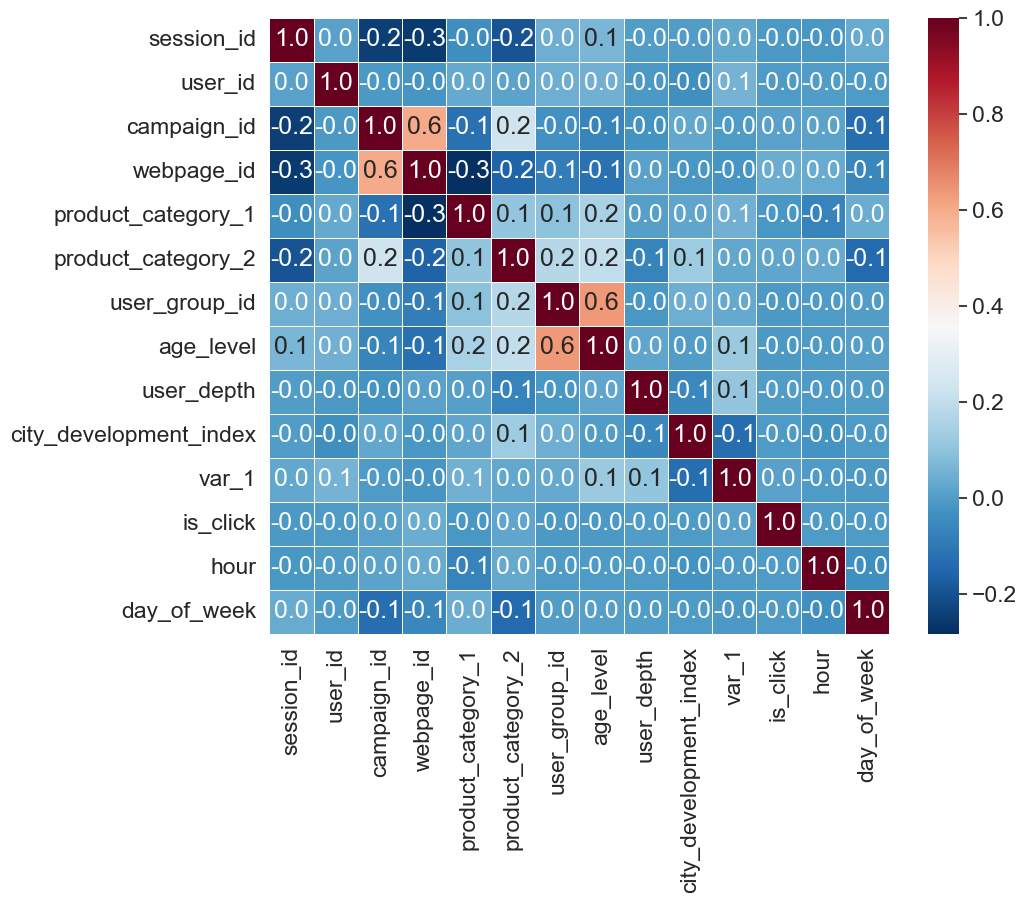

In [82]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df2.select_dtypes(include='number').corr(), annot = True, linewidth=0.5, fmt='0.1f', cmap = 'RdBu_r')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

The heatmap lets to check a correlation matrix. The most of the features are not highly correlated to another ones. One can to observe that the highest positive correlation (0.6) is between campaign_id and webpage_id. The same correlation has also user_group_id and age_level. There are also see negative correlations between some variables. None of variable is correlated with target variable.

### Summary

This project was aimed to exploratory data analysis of Ad click dataset. From above analysis one can conclude as follows:
- the overall click through rate (CTR) is around 7% and the 93% ads are not clicked;
- more of the users are men than women and the male users are click more than female but the CTR indicator does not differ much by gender;
- the most of users are twenty, thirty year old i.e group of age_level 3 and 2 and they get the most impressions and clicks. Although levels 2 and 3 get the most impressions and clicks they have not a biggest CTR value. The highest CTR have level 0 and 6 i.e. children and olds;
- the majority of the users are in 3 and 2 groups and they are get the most impressions and clicks. The highest CTR have groups 0 and 12 although groups 3 and 2 have the most impressions and clicks;
- the highest number of clicks and impressions are at hour 20.00, and the lowest number of clicks are at hour 2.00 at night. The highest CTR happened in at hours 1.00, 6.00 and 7.00; 
- the majority of impressions and clicks are in Mondays and Wednesdays. Thuesdays and Fridays have the least number of impressions and clicks. The highest CTR have Mondays and Thuesdays;
- there are ten different products in data. Products C and H get the most impressions and clicks and they seem to be nice choice for placing advertisements as per number of clicks;
- in variable city_development_index one can distinct four different values. Group 2 gets the most impressions and clicks and has the heighest CTR;
- there are 10 different campaigns. The id with the most impressions and clicks seems to be a good choice for placing advertisements;
- there are 9 different webpages and the webpage with the most impressions and clicks seems to be a good choice for placing advertisements.
